In [1]:
library(extrafont)
library(tidyverse)
library(epidemia)
library(arrow)
library(zoo)

Registering fonts with R

── Attaching core tidyverse packages ───────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ─────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘arrow’


The following object is masked from ‘package:lubridate’:

    duration


The following object is masked from ‘package:utils’:

    timestamp



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




# 1. parameters

In [2]:
T0 = 40

## observation parameters

In [3]:
alpha = 0.01

$$Y_t = NegBinom( \frac{EY_t}{r_Y + EY_t}, r_Y )$$

$$ EY_t = \alpha\sum_{s=1}^{t-1} I_s \pi_{t-s} $$

## latent parameters

In [4]:
K = 6.5

$$I_t = NegBinom( \frac{EI_t}{r_I + EI_t}, r_I )$$

$$ EI_t = R(\bar{A}_t, \beta) \sum_{s=1}^{t-1} I_s g_{t-s} $$

$$R(\bar{A}_t, \beta) = \frac{K}{1+\exp(- \beta^\top A_t)}$$

## seed values

$$I_{-T_0} = \mu_0$$

# 2. load data

In [5]:
data <- read_feather('data/CovidCastStateAdj_2.feather')

In [6]:
data = (data 
        %>% transmute(
            region = geo_value,
            date = date(time_value),
            deaths = as.integer(pmax(data$deaths, 0)),
            intervention = full_time_work_prop) 
        %>% group_by(region)
        %>% filter(max(deaths) > 20)
        %>% filter(date > date[which(cumsum(deaths) > 10)[1]] - 30))

In [7]:
data = data %>% mutate(iv_ma7 = rollmean(x = intervention, 7, fill=NA))

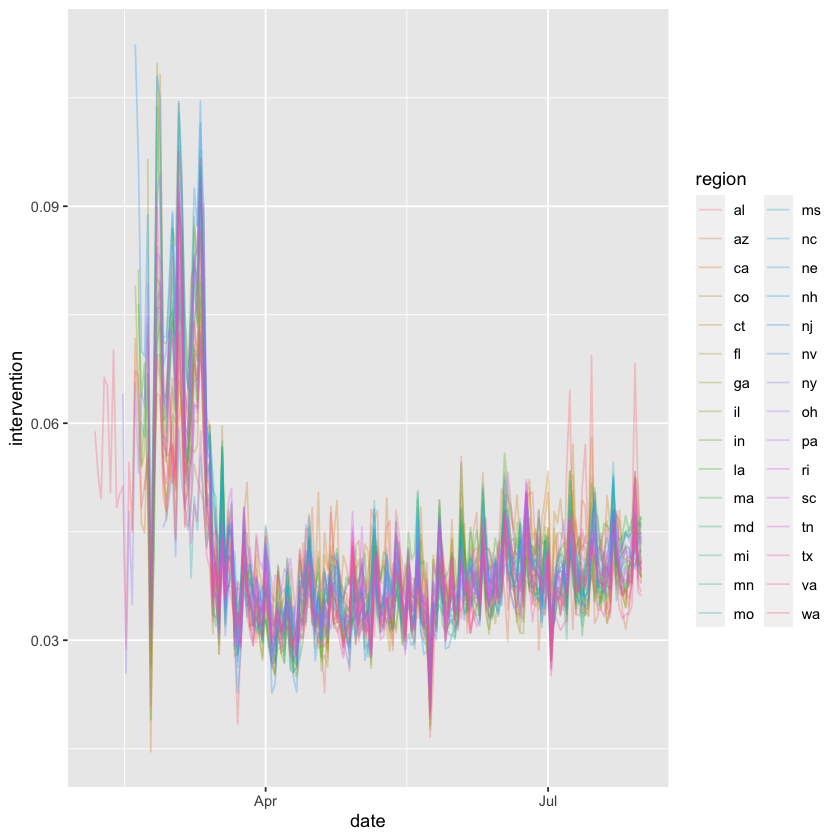

In [ ]:
ggplot(data) + geom_line(aes(date, intervention, group = region, color = region), alpha = 0.3) 

Warning message:
“Removed 180 rows containing missing values (`geom_line()`).”


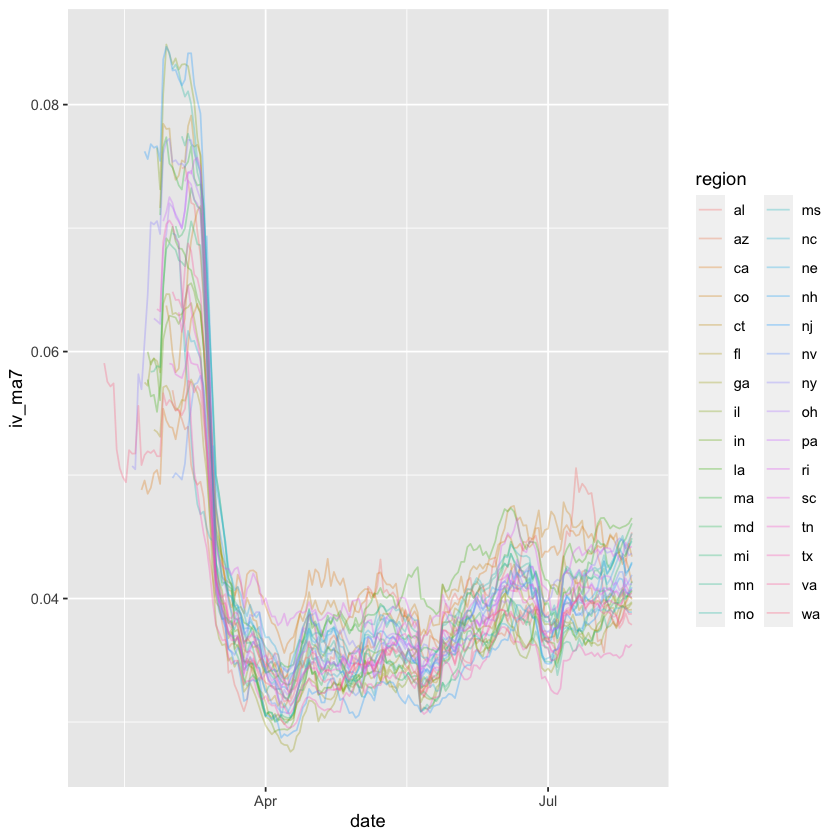

In [9]:
ggplot(data) + geom_line(aes(date, iv_ma7, group = region, color = region), alpha = 0.3) 

In [10]:
data = data %>% group_modify(~ {
    data.frame(date = c(min(.x$date)+(-T0:-1), .x$date),
               deaths = c(rep(NA,T0), .x$deaths),
               intervention = c(rep(0,T0), .x$intervention * (-20) + 1.6))}
)

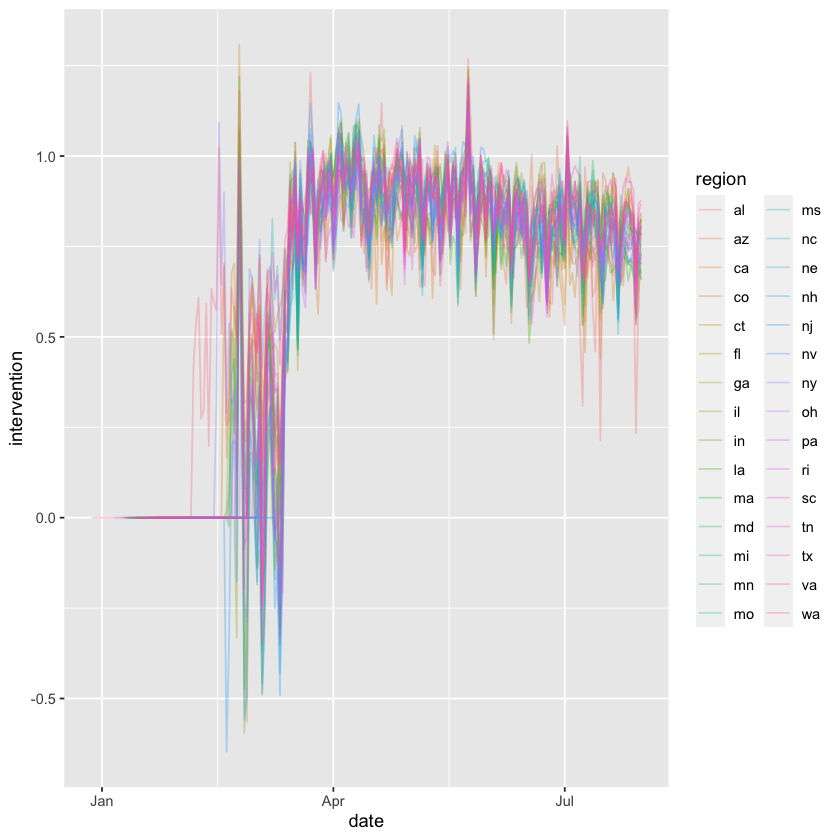

In [11]:
ggplot(data) + geom_line(aes(date, intervention, group = region, color = region), alpha = 0.3) 

In [12]:
data

region,date,deaths,intervention
<chr>,<date>,<int>,<dbl>
al,2020-01-22,NA,0
al,2020-01-23,NA,0
al,2020-01-24,NA,0
al,2020-01-25,NA,0
al,2020-01-26,NA,0
al,2020-01-27,NA,0
al,2020-01-28,NA,0
al,2020-01-29,NA,0
al,2020-01-30,NA,0


# 3. fit

In [13]:
# rt <- epirt(formula = R(region, date) ~ 1 + intervention
#             + (1 + intervention || region),
#             prior = normal(0, 1),
#             prior_intercept = normal(0, 1),
#             prior_covariance = decov(shape = c(1, 1), scale = 1),
#             link = scaled_logit(K))

In [14]:
# rt <- epirt(formula = R(region, date) ~ 1 + intervention
#             + (1 + intervention || region),
#             prior = normal(0, 5),
#             prior_intercept = normal(0, 8),
#             prior_covariance = decov(shape = c(1, 5), scale = 1),
#             link = scaled_logit(K))

In [15]:
# rt <- epirt(formula = R(region, date) ~ 0 +
#             + (1 + intervention || region)
#             + intervention,
#             prior = shifted_gamma(shape = 1/6, scale = 1, shift = log(1.05)/6),
#             prior_covariance = decov(shape = c(2, 0.5), scale = 0.25),
#             link = scaled_logit(K))

In [16]:
rt <- epirt(formula = R(region, date) ~ 0 +
            + (1 + intervention || region)
            + intervention,
            prior = shifted_gamma(shape = 1/6, scale = 1, shift = log(1.05)/6),
            prior_covariance = decov(shape = c(2, 0.5), scale = 0.25),
            link = scaled_logit(K))

In [17]:
inf <- epiinf(gen = EuropeCovid$si, seed_days = T0)

In [18]:
deaths <- epiobs(formula = deaths ~ 1, i2o = EuropeCovid2$inf2death,
                 prior_intercept = normal(0, 0.01), link = scaled_logit(2*alpha))

Warning message:
“i2o does not sum to one. Please ensure this is intentional.”


In [19]:
args <- list(rt = rt, inf = inf, obs = deaths, data = data, 
             seed=12345, refresh=0)

In [20]:
args$algorithm <- "fullrank"; args$iter <- 5e4; args$tol_rel_obj <- 1e-3

In [21]:
fm <- do.call(epim, args)

Warning message:
“Pareto k diagnostic value is 36.38. Resampling is disabled. Decreasing tol_rel_obj may help if variational algorithm has terminated prematurely. Otherwise consider using sampling instead.”


In [22]:
as.data.frame(fm$stanfit)

R|intervention,R|b[(Intercept) region:al],R|b[(Intercept) region:az],R|b[(Intercept) region:ca],R|b[(Intercept) region:co],R|b[(Intercept) region:ct],R|b[(Intercept) region:fl],R|b[(Intercept) region:ga],R|b[(Intercept) region:il],R|b[(Intercept) region:in],⋯,seeds[pa],seeds[ri],seeds[sc],seeds[tn],seeds[tx],seeds[va],seeds[wa],seeds_aux,deaths|reciprocal dispersion,log-posterior
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-1.29815,-0.18292200,-0.26085900,-0.16879600,-0.3600730,-0.211956000,-0.16548000,-0.13948300,-0.19810900,-0.05767520,⋯,556.274,187.009,52.0100,70.7416,150.9850,232.641,87.8040,65.0533,10.1271,0
-1.96341,0.09388850,0.14659800,0.00810636,-0.1759400,-0.122790000,0.13669900,0.11499800,0.05616860,-0.04906480,⋯,385.701,114.744,64.4682,75.6847,98.5349,210.658,41.7459,121.5290,10.1749,0
-1.60613,-0.05043620,0.04935180,0.08186860,-0.1016520,-0.045375500,-0.01064440,-0.02014530,-0.12223400,-0.08978400,⋯,357.841,207.065,68.7284,74.5659,132.6550,165.465,94.4397,84.2389,10.1947,0
-1.79229,-0.12481700,-0.06320810,0.06484460,-0.0330518,-0.033515500,0.10972500,-0.01802010,-0.08538760,-0.02732460,⋯,394.839,154.832,86.7634,84.1777,100.7140,158.053,128.7580,135.8930,10.1173,0
-1.83303,-0.02667200,0.04960870,0.02094960,-0.0189299,-0.231657000,-0.03765350,0.04571420,-0.15227800,-0.00514692,⋯,282.158,141.781,78.5822,62.2064,74.8374,137.484,115.6930,125.0670,10.1205,0
-1.66081,-0.02097210,-0.09572370,-0.01655470,-0.1786380,-0.022938200,-0.12225000,-0.13977700,0.07814330,-0.06616490,⋯,378.977,190.196,57.5745,116.8150,113.2170,172.163,85.7657,70.9047,10.1515,0
-1.61353,-0.11431300,-0.07653020,-0.08399320,-0.2023800,-0.089562500,-0.05665420,-0.10908000,-0.09376610,-0.04258550,⋯,377.955,206.044,40.4135,88.0551,100.5830,166.109,38.9295,65.9355,10.1998,0
-1.92434,-0.00796288,0.07584880,0.01278990,0.0335572,0.046456700,-0.06565120,0.07186230,0.10268300,0.01586700,⋯,361.470,174.888,56.1558,116.7240,193.8210,163.192,62.4231,68.8094,10.1711,0
-1.76505,-0.07528080,-0.02557030,-0.02684890,-0.2505160,-0.011379600,0.10460300,-0.22755600,-0.08008630,0.01182330,⋯,325.710,160.043,61.6349,83.8280,94.1604,133.938,54.6190,189.8930,10.1265,0


In [23]:
# write_feather(as.data.frame(fm$stanfit),
#               'result_epidemia_delphi.feather')

## plots

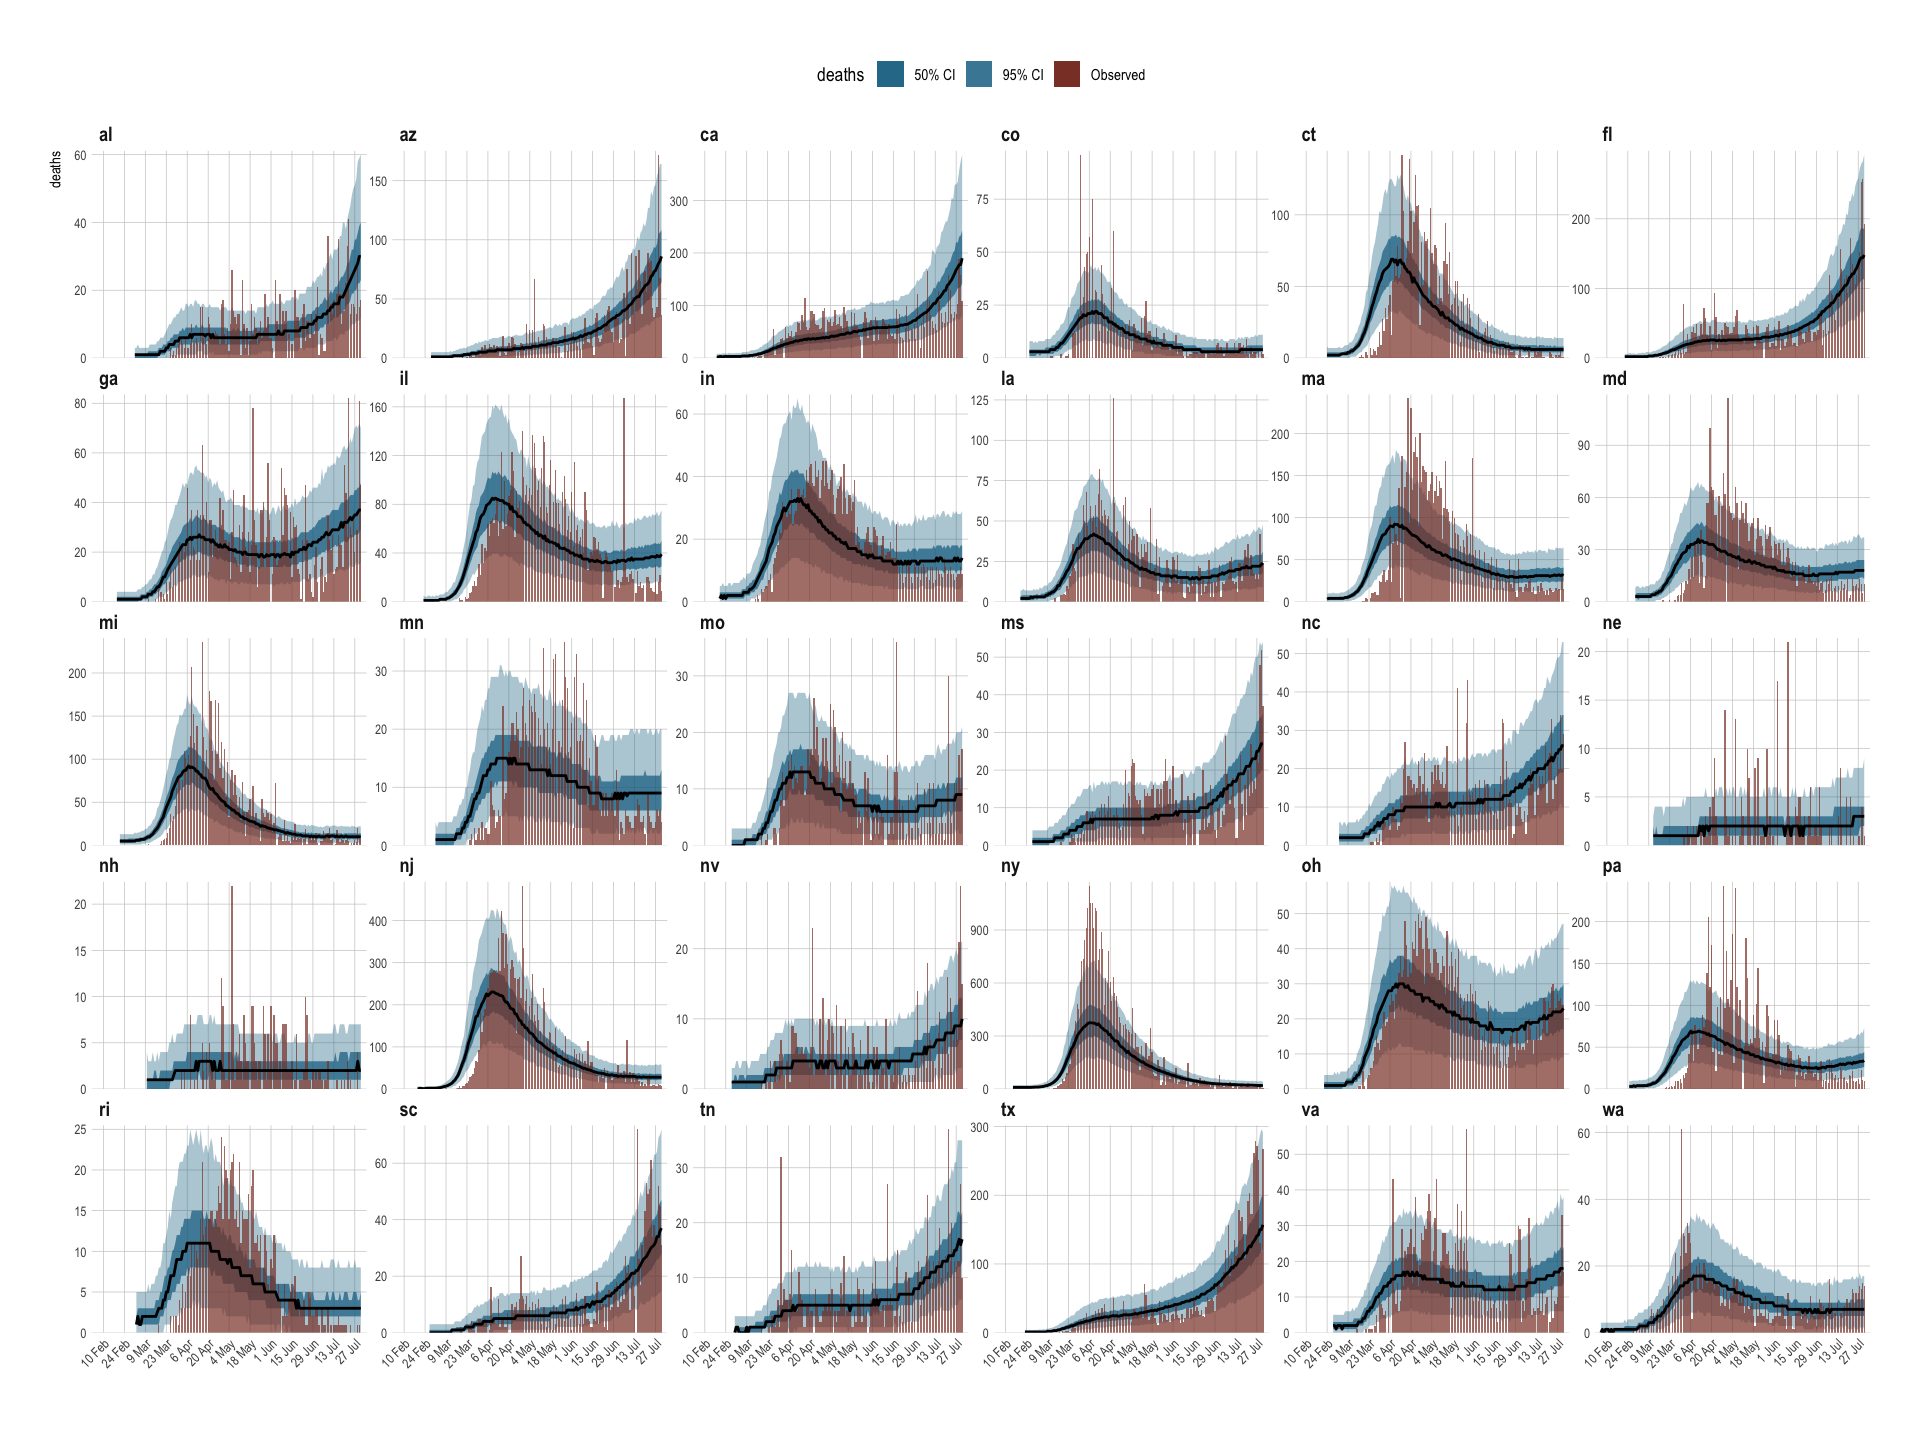

In [24]:
options(repr.plot.width = 16, repr.plot.height = 12)
plot_obs(fm, type="deaths", levels = c(50, 95))

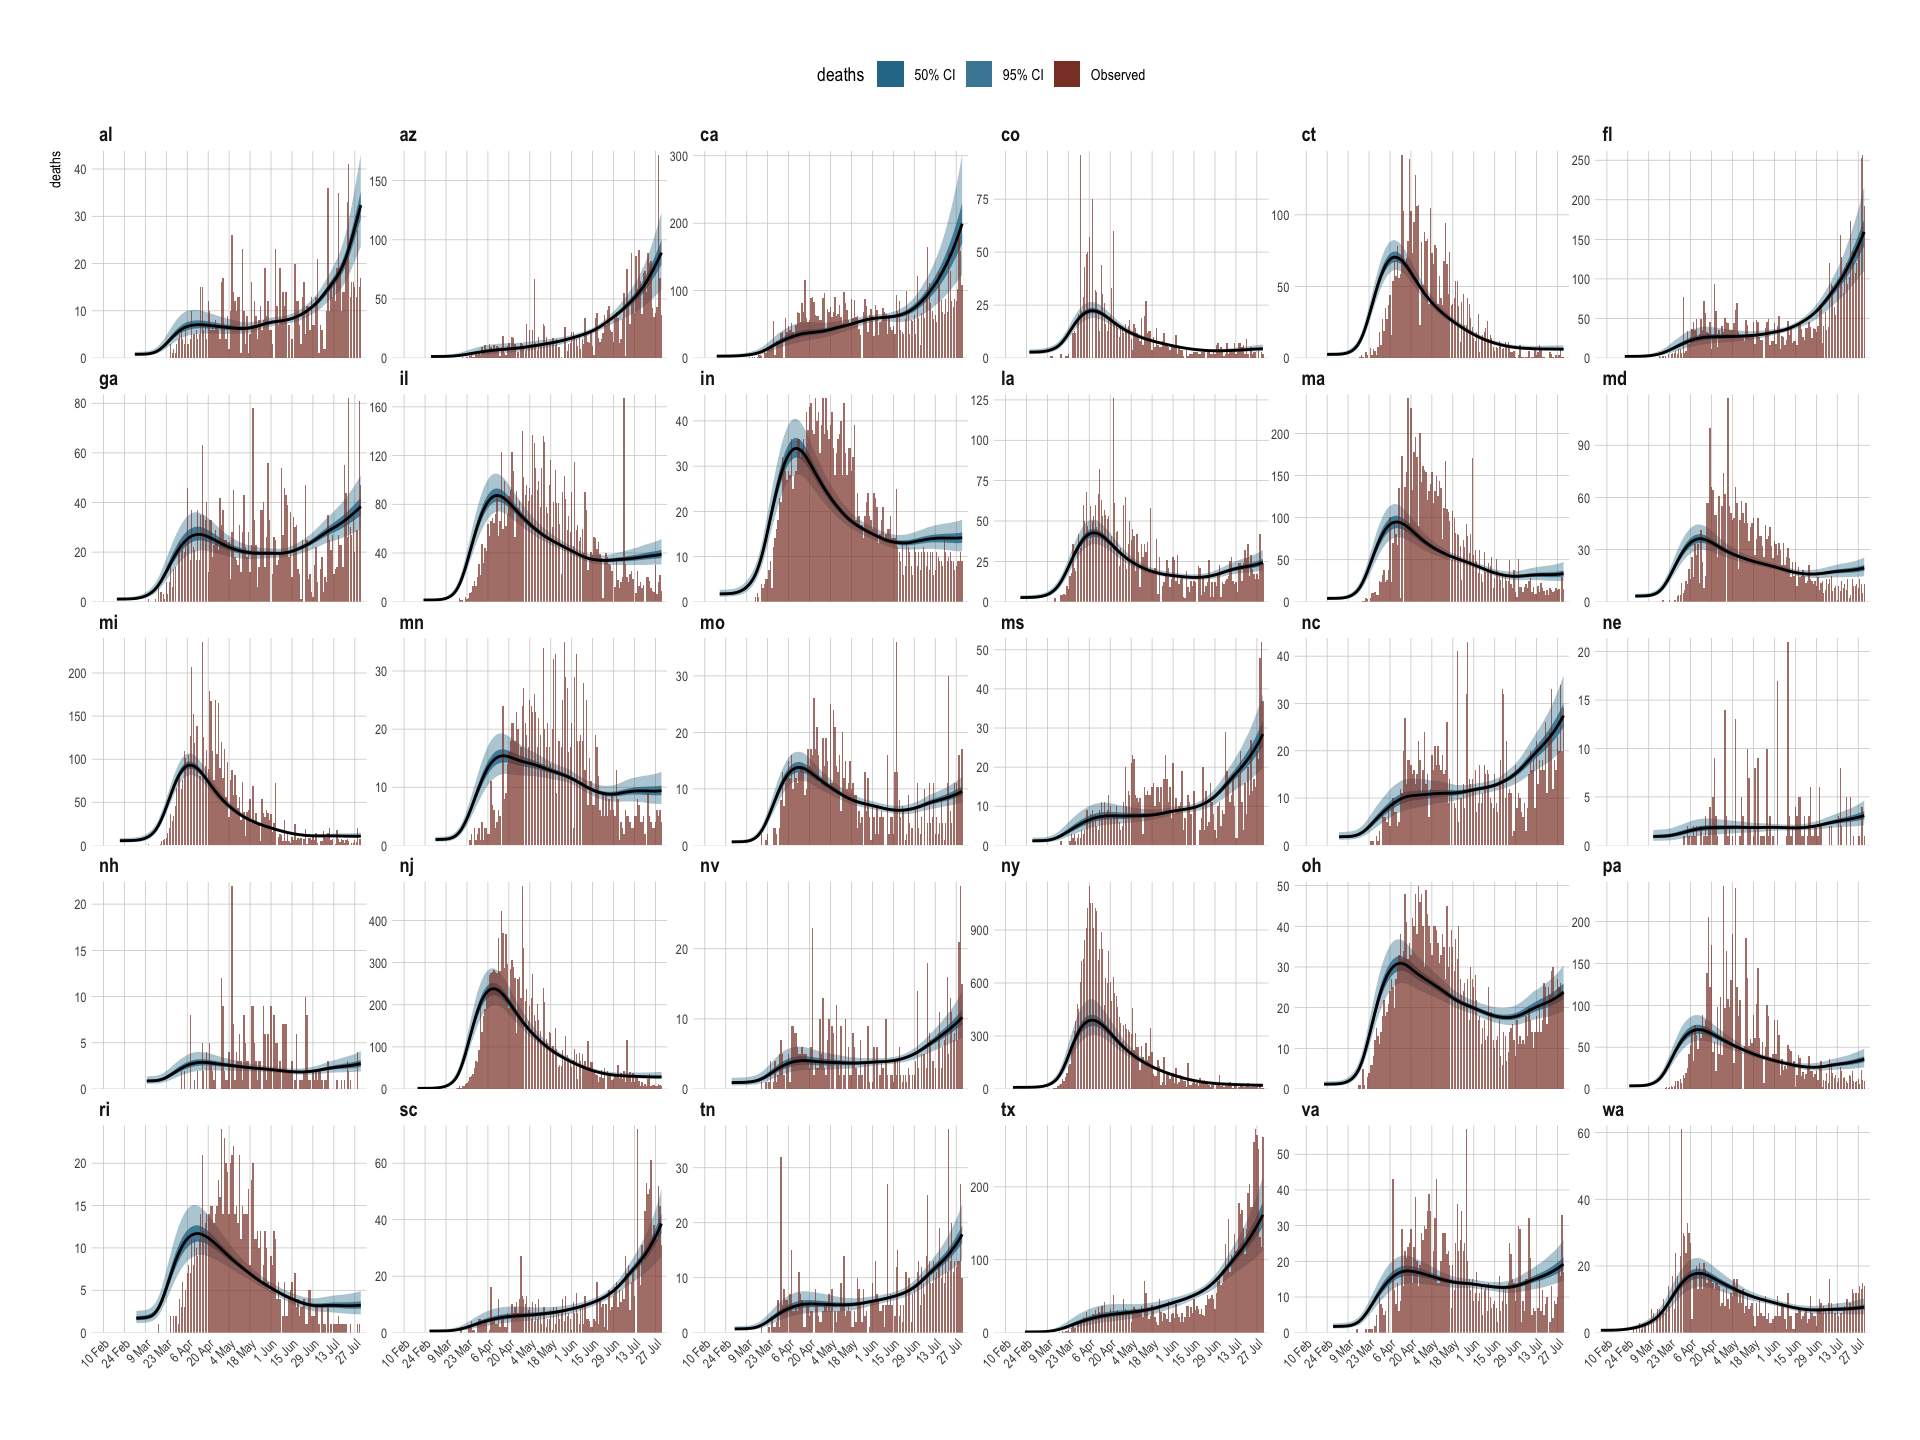

In [25]:
options(repr.plot.width = 16, repr.plot.height = 12)
plot_obs(fm, type="deaths", levels = c(50, 95), posterior_mean=TRUE)

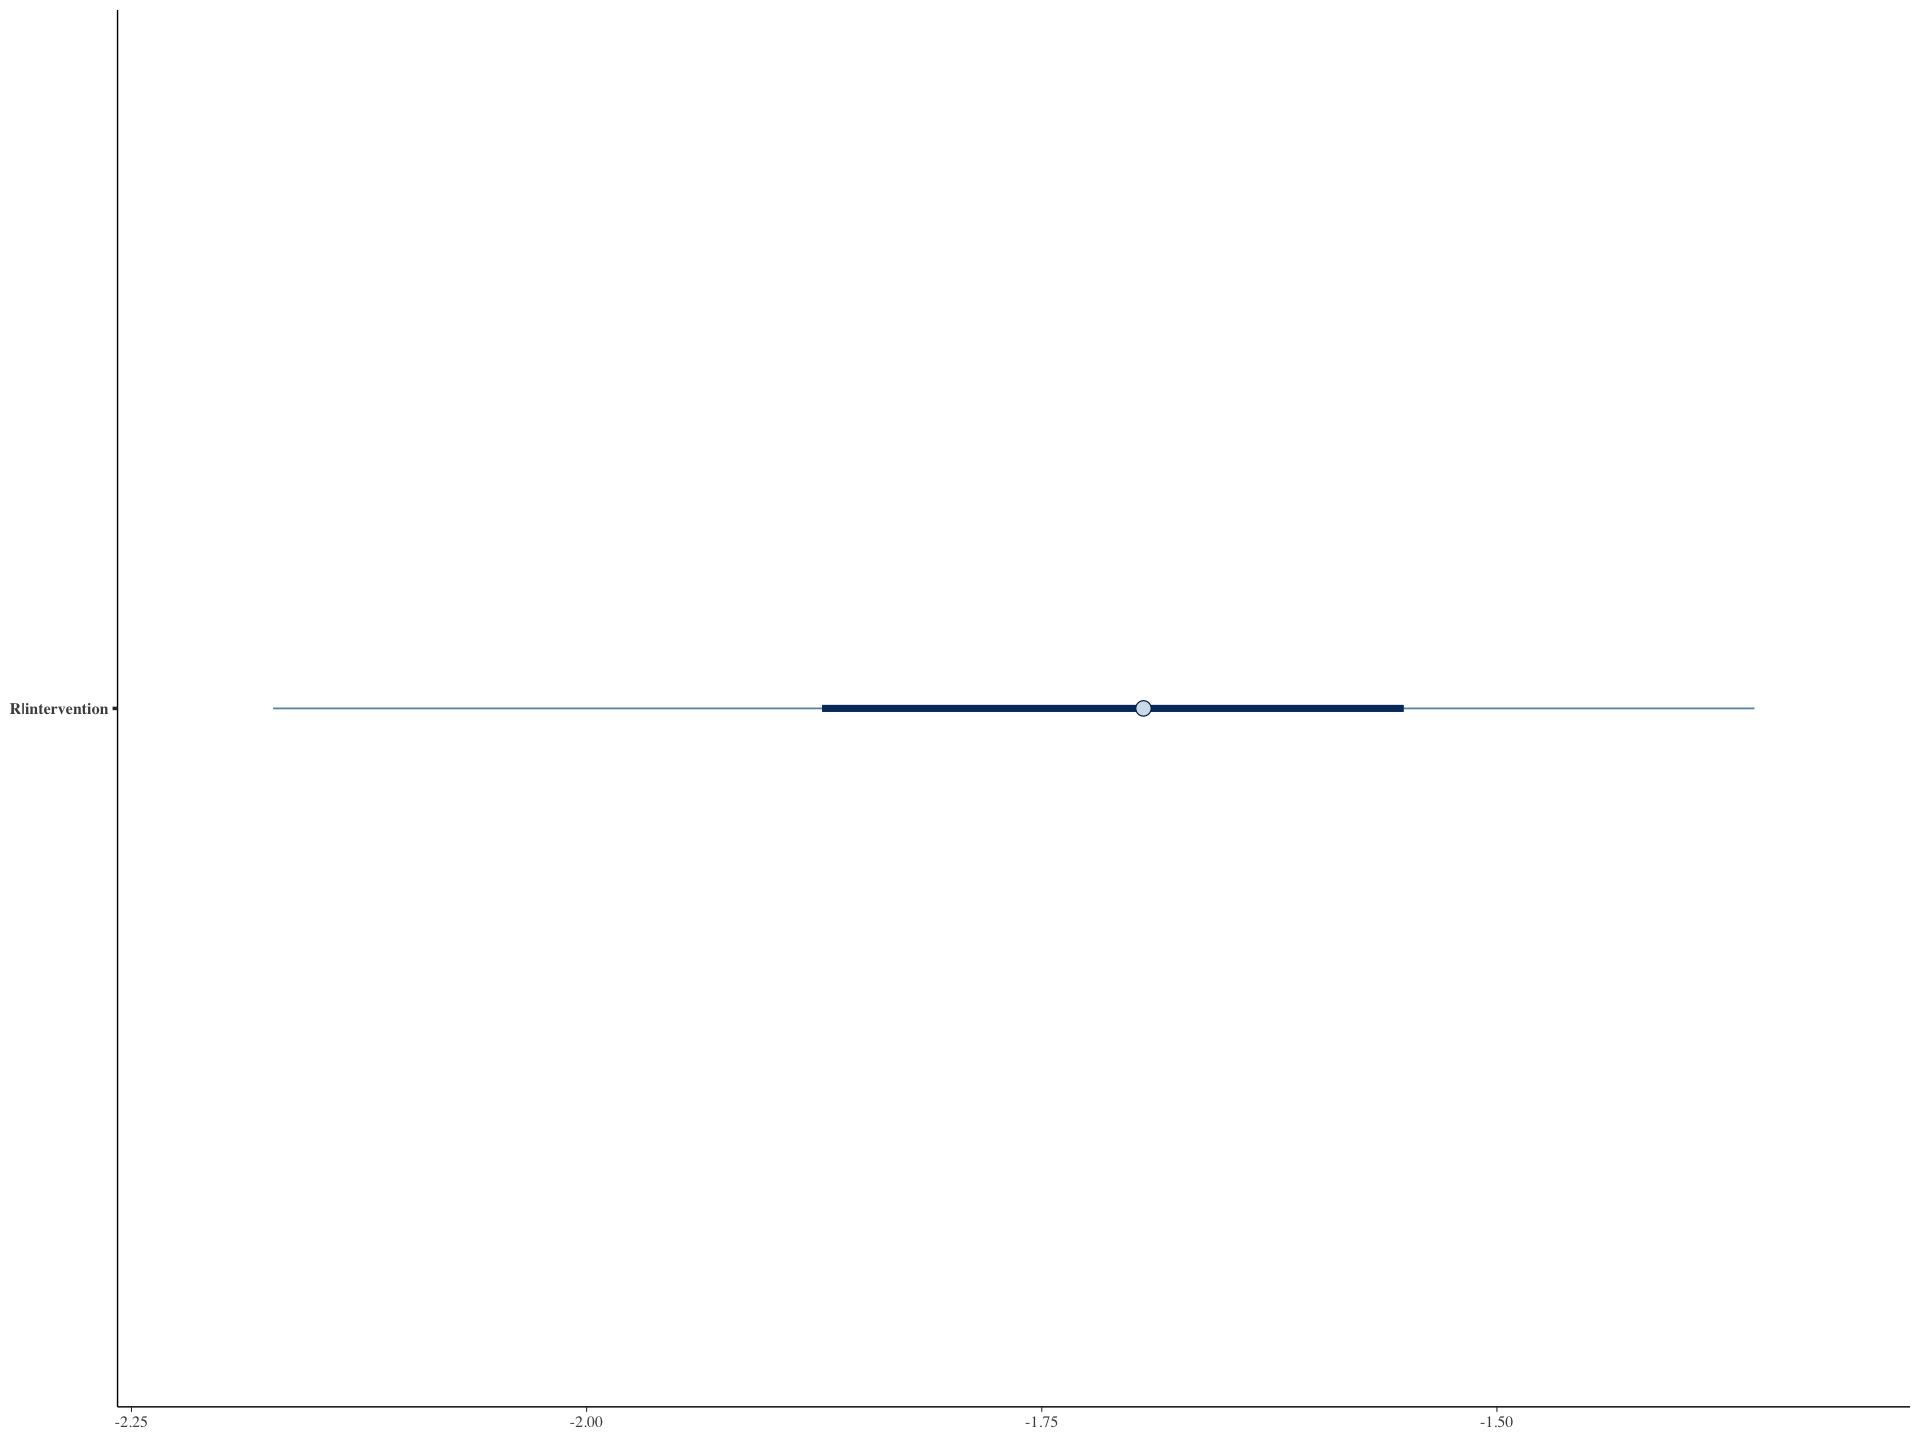

In [26]:
plot(fm, par_models = "R", par_types = "fixed")

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


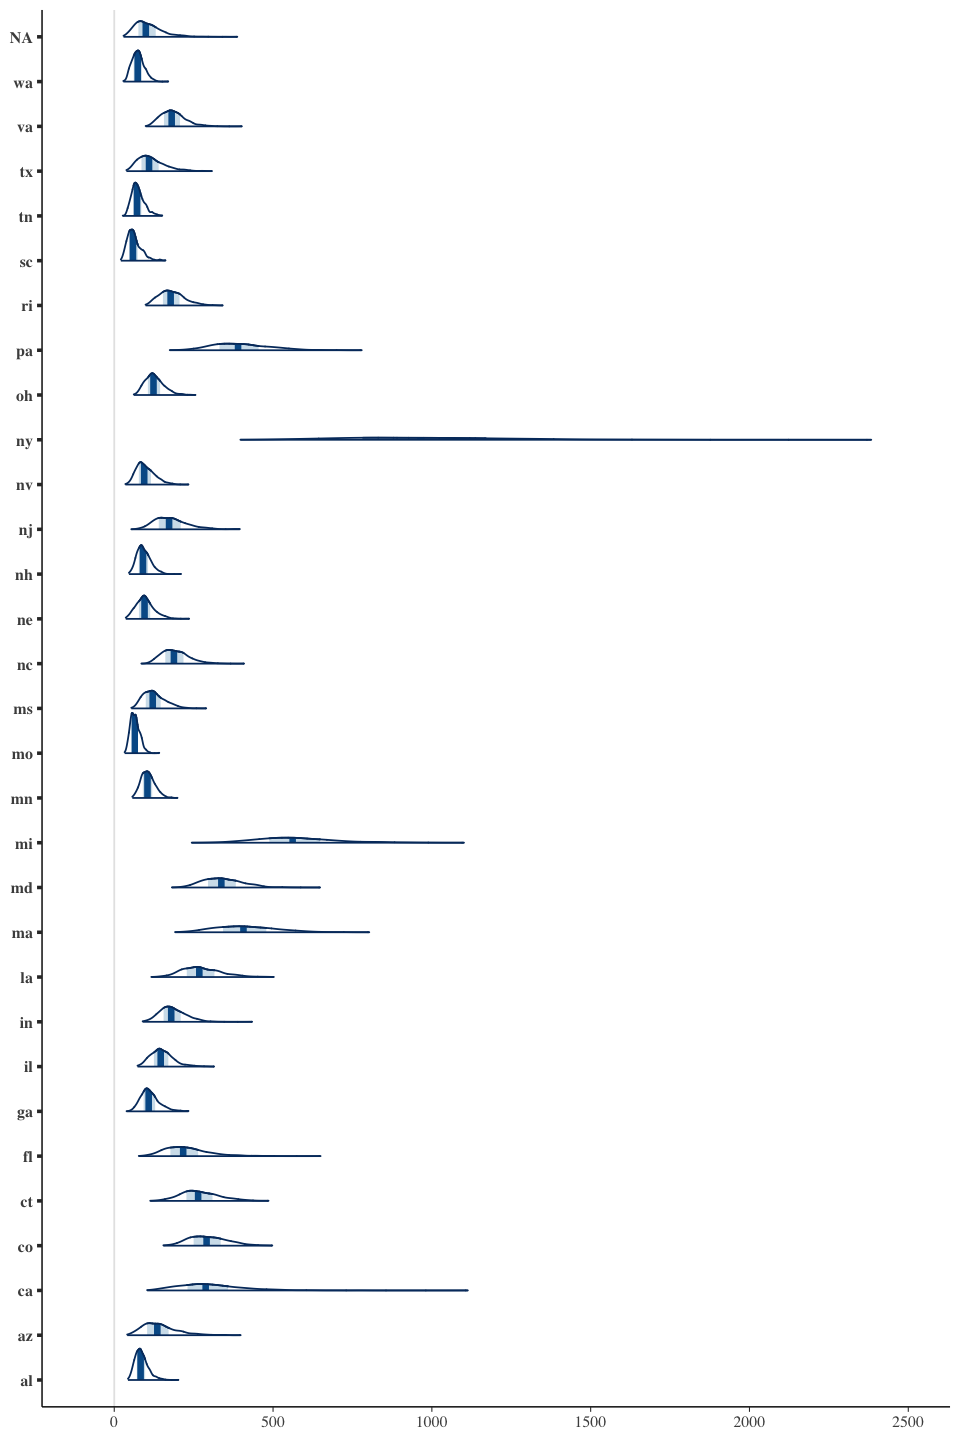

In [27]:
options(repr.plot.width = 8, repr.plot.height = 12)
plot(fm, "areas", regex_pars = "seeds", par_groups = fm$groups) + scale_y_discrete(labels=fm$groups)

In [28]:
# options(repr.plot.width = 8, repr.plot.height = 12)

# beta <- as.matrix(fm, regex_pars = "R\\|\\(Int")
# b <- as.matrix(fm, regex_pars = "R\\|b\\[\\(Int")
# mat <- sweep(b, MARGIN=1, STATS = beta, FUN = "+")

# bayesplot::mcmc_intervals(mat) + scale_y_discrete(labels=fm$groups)

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


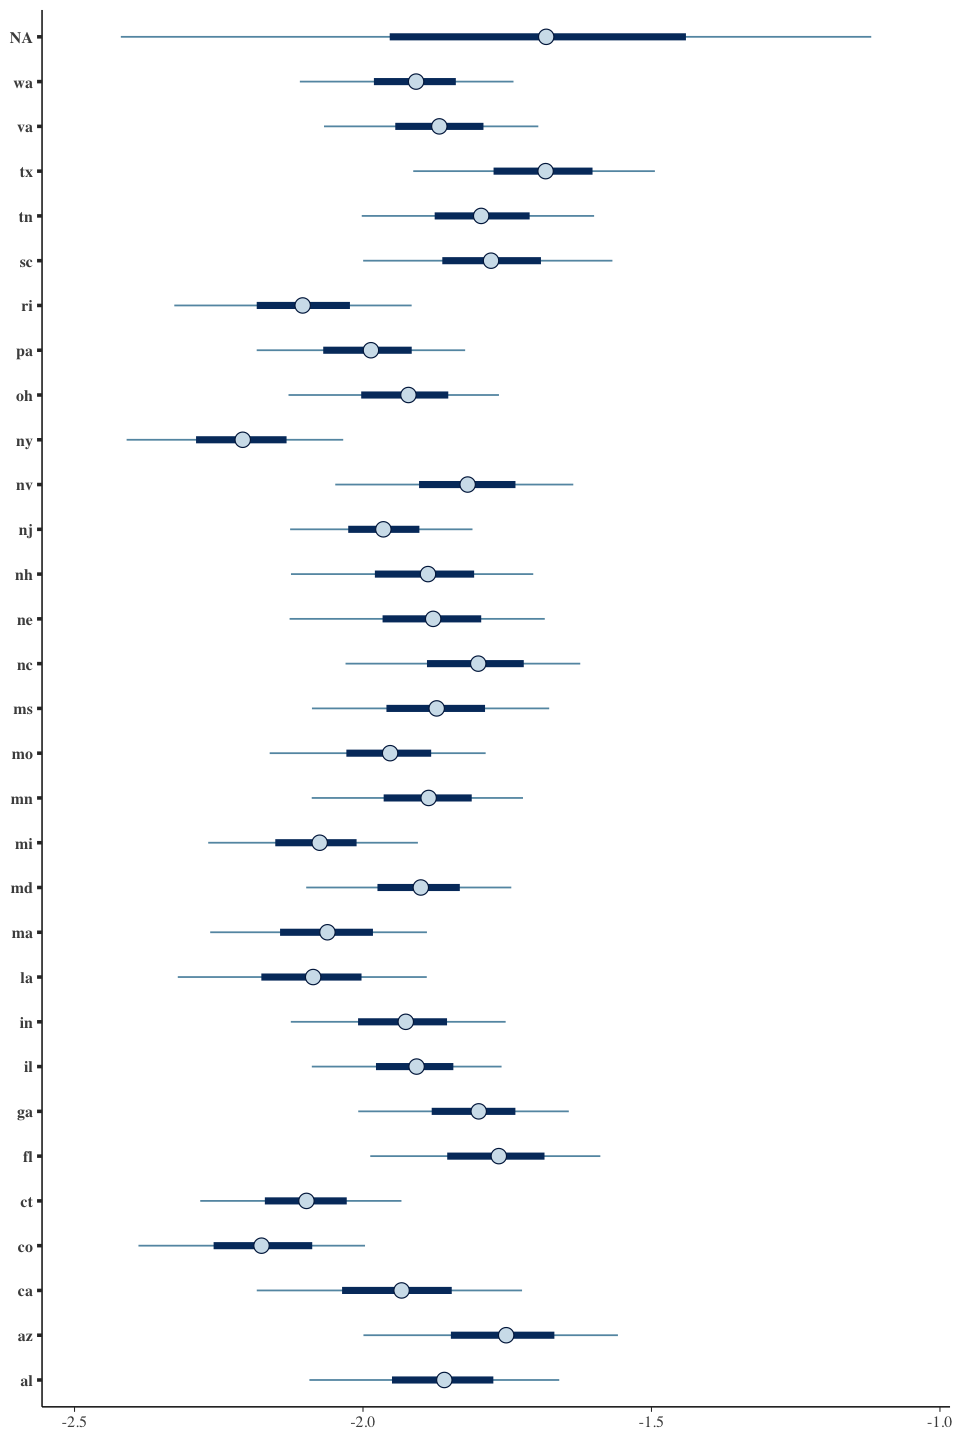

In [29]:
options(repr.plot.width = 8, repr.plot.height = 12)

beta <- as.matrix(fm, regex_pars = "R\\|int")
b <- as.matrix(fm, regex_pars = "R\\|b\\[int")
mat <- sweep(b, MARGIN=1, STATS = beta, FUN = "+")

bayesplot::mcmc_intervals(mat) + scale_y_discrete(labels=fm$groups)

# 4. Counterfactuals

In [31]:
data_i = data %>% filter(region == 'ny')

In [56]:
A = data_i$intervention
T = length(A)

In [60]:
Tf = 60
Af_dec = rev(A)[1:Tf]*(1 + seq(0,0.2,length=Tf))
Af_inc = A[(T-Tf+1):T]+A[T]-A[T-Tf]

In [67]:
newdata_i = data.frame(
    region = rep('ny',T+Tf),
    date = c(data_i$date, max(data_i$date)+seq(Tf)),
    deaths = c(data_i$deaths, rep(NA,Tf)),
    intervention = c(A,Af_inc))

In [80]:
newdata_dec = data %>% group_modify(~ {
    data.frame(date = c(.x$date, max(.x$date)+seq(Tf)),
               deaths = c(.x$deaths, rep(0,Tf)),
               intervention = c(.x$intervention, rev(.x$intervention)[1:Tf]
                                *(1+seq(0,0.2,length=Tf)))
)})

In [81]:
newdata_inc = data %>% group_modify(~ {
    data.frame(date = c(.x$date, max(.x$date)+seq(Tf)),
               deaths = c(.x$deaths, rep(0,Tf)),
               intervention = c(.x$intervention, 
                                .x$intervention[(length(.x$date)-Tf+1):length(.x$date)]
                                +.x$intervention[length(.x$date)]-.x$intervention[length(.x$date)-Tf])
)})

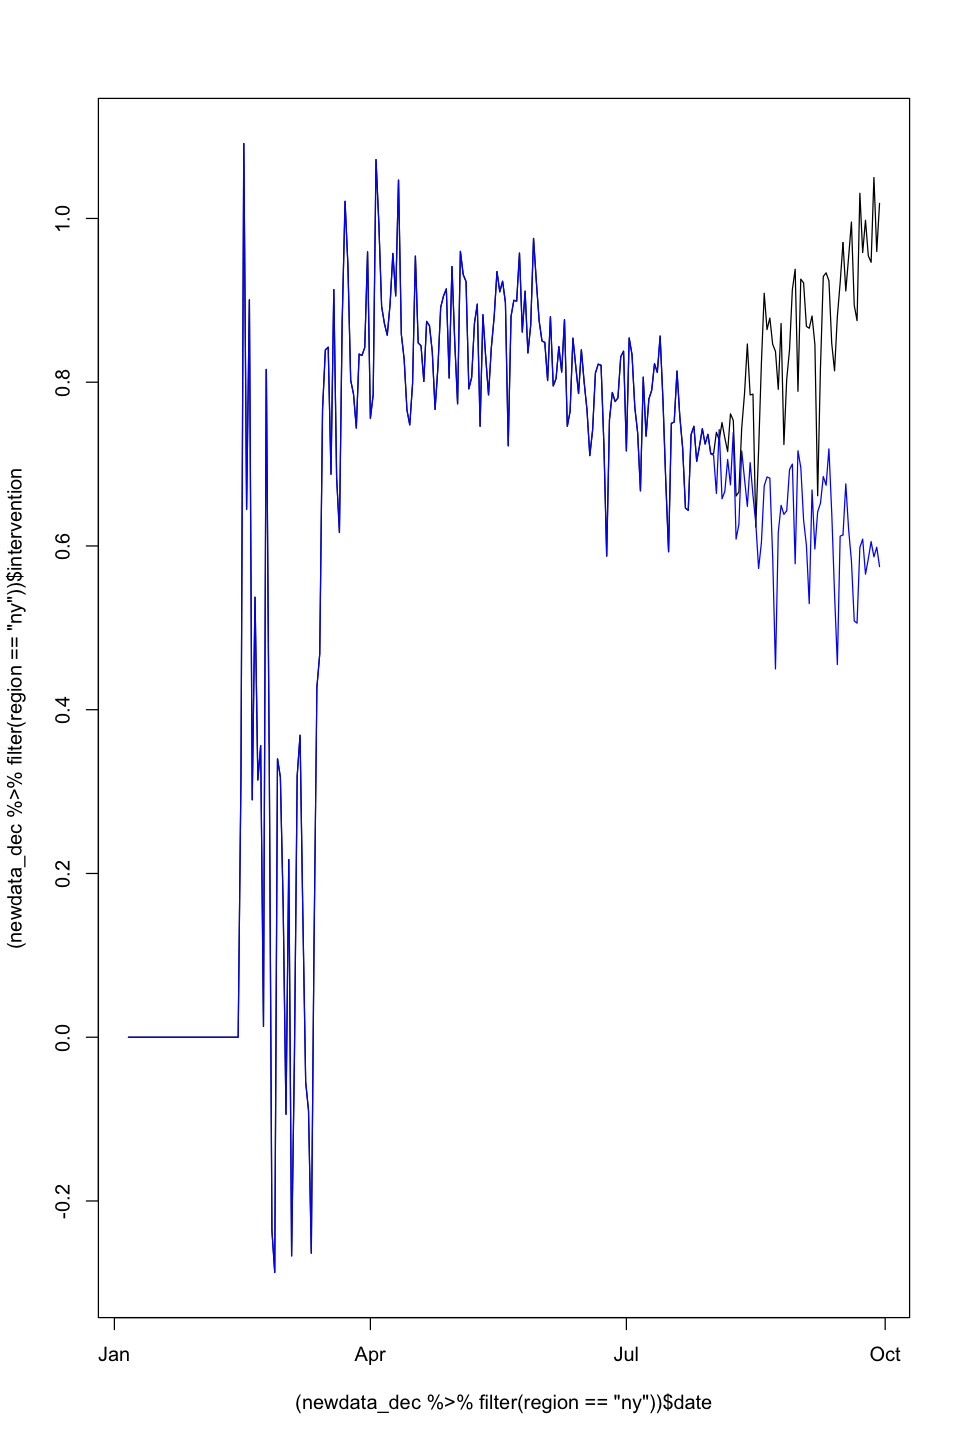

In [82]:
plot((newdata_dec %>% filter(region == 'ny'))$date,
     (newdata_dec %>% filter(region == 'ny'))$intervention, type='l')
lines((newdata_inc %>% filter(region == 'ny'))$date,
      (newdata_inc %>% filter(region == 'ny'))$intervention, col='blue')

In [96]:
obs_dec = posterior_predict(fm, type="deaths", newdata=newdata_dec, posterior_mean=TRUE)

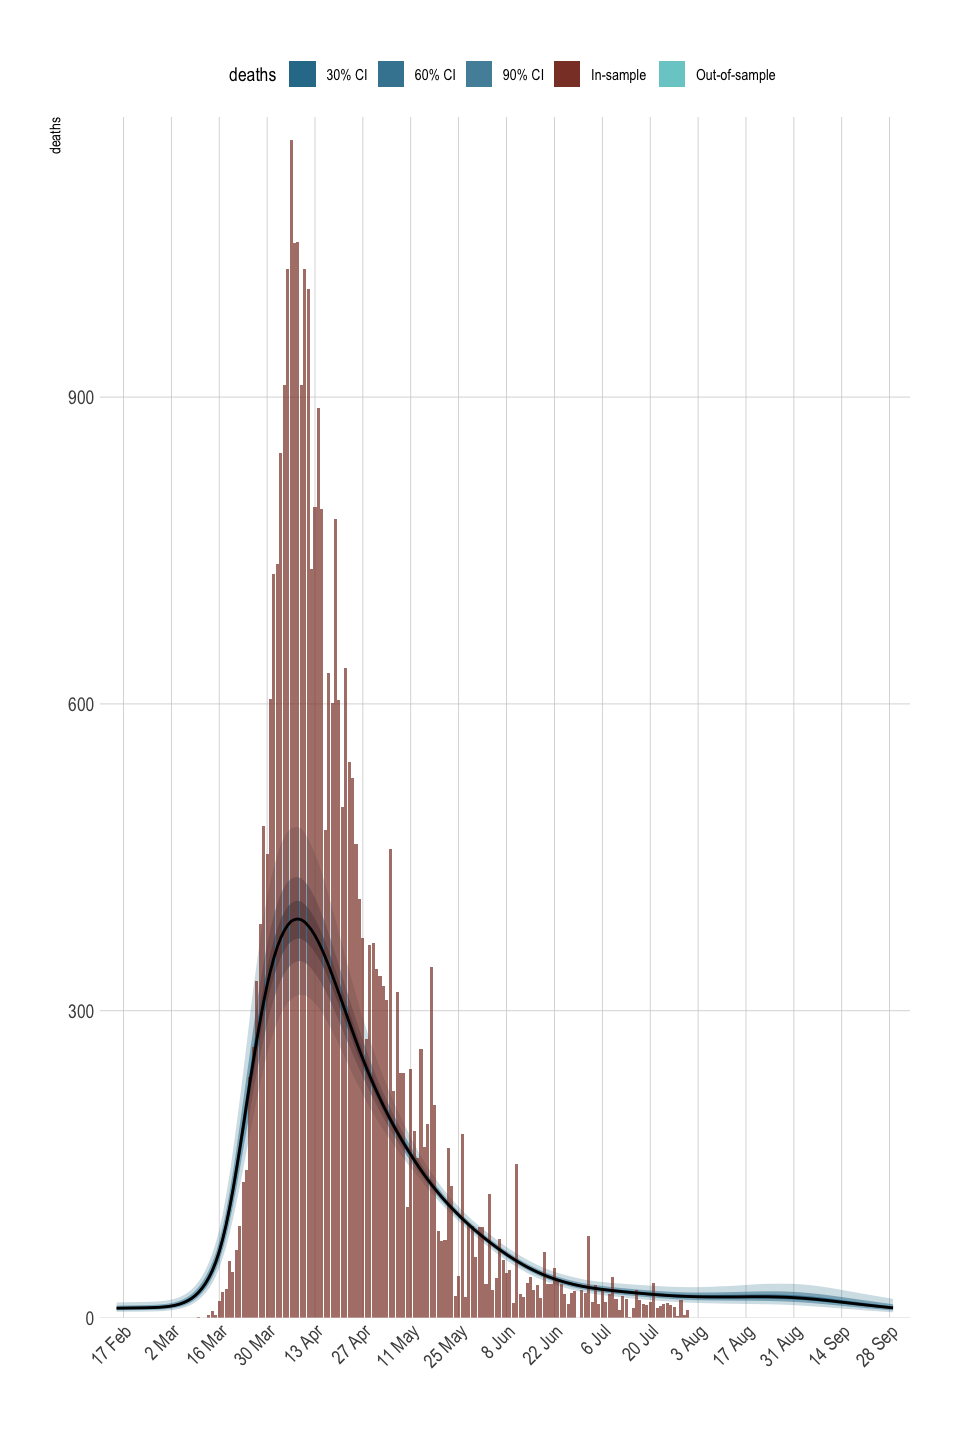

In [107]:
plot_obs(fm, type="deaths", newdata=newdata_dec, posterior_mean=TRUE, groups='ny')

In [104]:
write_feather(data.frame(
    EY = t(obs_dec$draws[,obs_dec$group=='ny'])
), 'counterfactual_epidemia_ny_dec.feather')

In [105]:
obs_inc = posterior_predict(fm, type="deaths", newdata=newdata_inc, posterior_mean=TRUE)

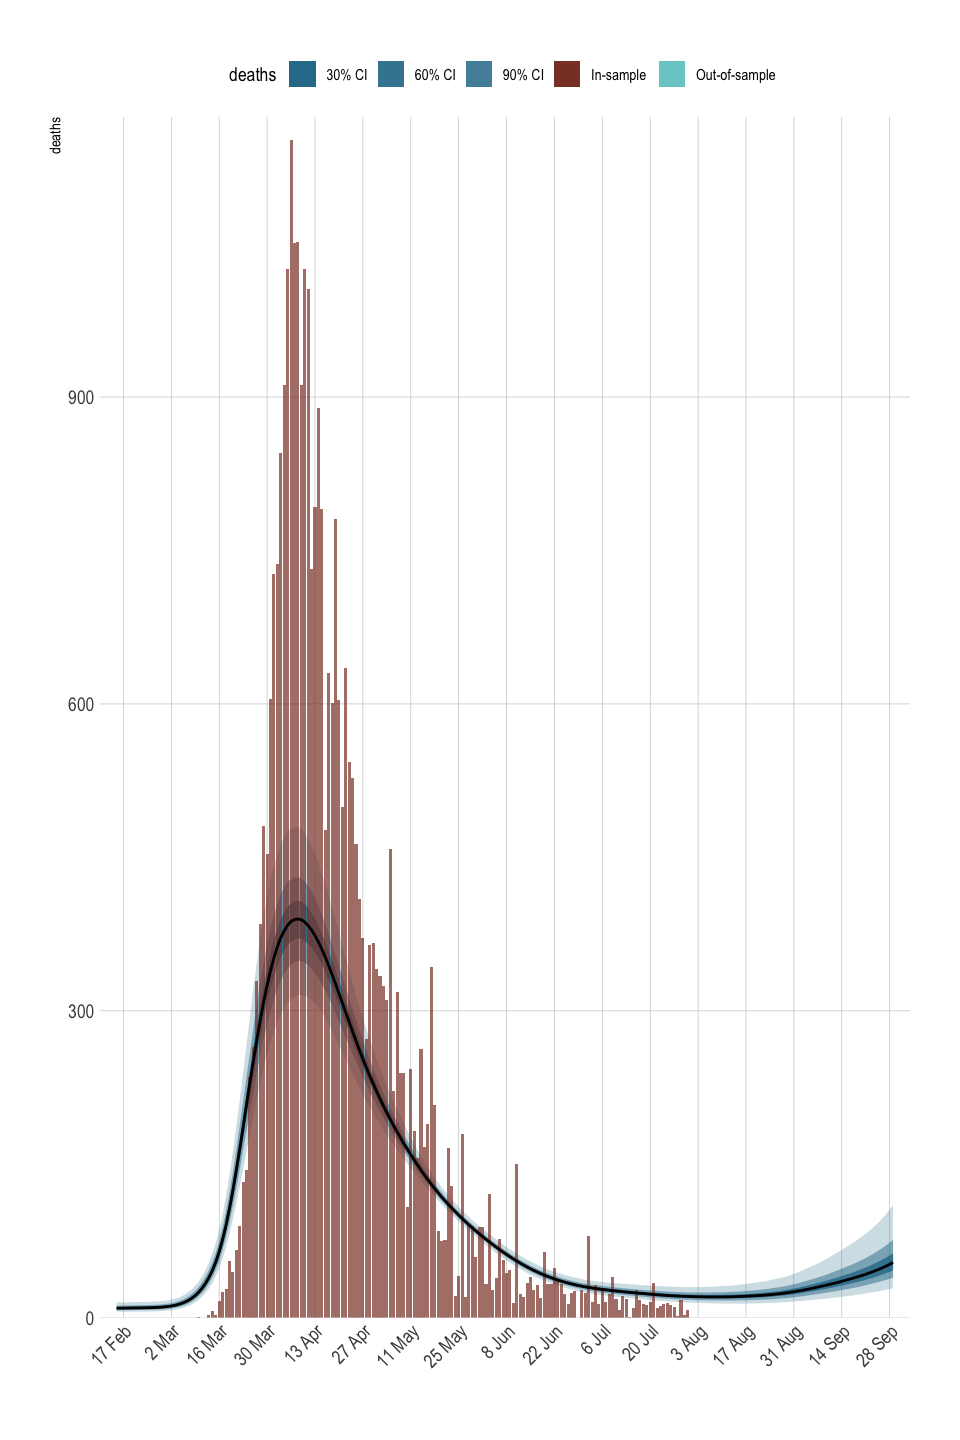

In [108]:
plot_obs(fm, type="deaths", newdata=newdata_inc, posterior_mean=TRUE, groups='ny')

In [106]:
write_feather(data.frame(
    EY = t(obs_inc$draws[,obs_dec$group=='ny'])
), 'counterfactual_epidemia_ny_inc.feather')